In [9]:
import pickle
from sklearn.model_selection import train_test_split
with open('Image-Dev-01.pkl','rb') as ifp:
    files,y_unique,X,y = pickle.load(ifp)

# Build Keras Model

We first need to split our data into training and test (sometimes called validation) segments.

There is an easy way to do this - train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"We have {X_train.shape[0]:5d} Training samples")
print(f"We have {X_test.shape[0]:5d} Test samples")

We have   759 Training samples
We have   375 Test samples


In [11]:
num_classes=len(list(set(y)))
print(f"We are trying to predict {num_classes} classes.")

We are trying to predict 3 classes.


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Convolution2D,MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2 
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf


In [13]:
model = Sequential()
# Make 64 Output Channels using a kernel size of size of 5,5
# Kernel should be an odd number
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(X_train[1].shape)))
# Step - 2 Pooling
# Set pool_size smaller than the kernel size
model.add(MaxPooling2D(pool_size=(2, 2)))
#Increase the number of channels that the 1st Conv2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_classes*4, activation='relu',kernel_initializer='uniform'))
model.add(Dense(num_classes, activation='softmax',kernel_initializer='uniform'))
model.summary()
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

# # simple early stopping
# #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# # More patient Early stopping 
model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20) #Little Patience

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        2336      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 12)               

In [14]:
history = model.fit(X_train,y_train,epochs = 400 , validation_data = (X_test, y_test),callbacks=[es])

Epoch 1/400
24/24 [==============================] - 1s 24ms/step - loss: 1.0979 - accuracy: 0.3505 - val_loss: 1.0917 - val_accuracy: 0.3093
Epoch 2/400
24/24 [==============================] - 1s 22ms/step - loss: 1.0406 - accuracy: 0.5059 - val_loss: 0.9235 - val_accuracy: 0.6720
Epoch 3/400
24/24 [==============================] - 1s 23ms/step - loss: 0.8097 - accuracy: 0.6126 - val_loss: 0.6588 - val_accuracy: 0.6587
Epoch 4/400
24/24 [==============================] - 1s 22ms/step - loss: 0.6562 - accuracy: 0.6324 - val_loss: 0.5567 - val_accuracy: 0.7147
Epoch 5/400
24/24 [==============================] - 1s 22ms/step - loss: 0.5611 - accuracy: 0.6798 - val_loss: 0.5053 - val_accuracy: 0.7067
Epoch 6/400
24/24 [==============================] - 1s 23ms/step - loss: 0.4938 - accuracy: 0.7167 - val_loss: 0.4505 - val_accuracy: 0.7440
Epoch 7/400
24/24 [==============================] - 1s 24ms/step - loss: 0.4542 - accuracy: 0.7457 - val_loss: 0.4318 - val_accuracy: 0.7413
Epoch 

Train: 1.000, Test: 1.000


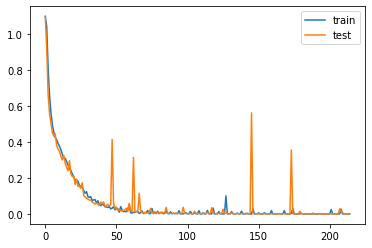

In [15]:
from matplotlib import pyplot
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
model.save('model/v0.0a')

INFO:tensorflow:Assets written to: model/v0.0a/assets
